<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap03/3_1_Shallow_Networks_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 3.1 -- Shallow neural networks I**

The purpose of this notebook is to gain some familiarity with shallow neural networks with 1D inputs.  It works through an example similar to figure 3.3 and experiments with different activation functions. <br>

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

Let's first construct the shallow neural network with one input, three hidden units, and one output described in section 3.1 of the book.

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  # TODO write code to implement the ReLU and compute the activation at the
  # hidden unit from the preactivation
  # This should work on every element of the ndarray "preactivation" at once
  # One way to do this is with the ndarray "clip" function
  # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.clip.html

  # If the preactivation is greater than 0, the activation is equal to the preactivation
  # If the preactivation is less than 0, the activation is equal to 0
  activation = preactivation.clip(min=0)

  return activation

In [3]:
def show_ReLU(z, ReLU_z):
    # Plot the ReLU function
    plt.plot(z, ReLU_z, label='ReLU')
    plt.title('Rectified Linear Unit (ReLU)')
    plt.xlabel('z')
    plt.ylabel('ReLU(z)')
    plt.legend()
    plt.show()

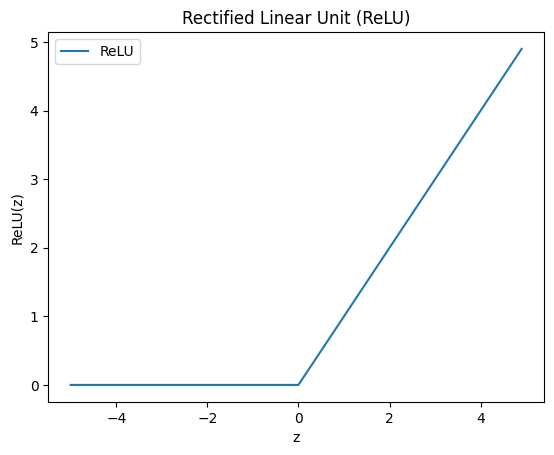

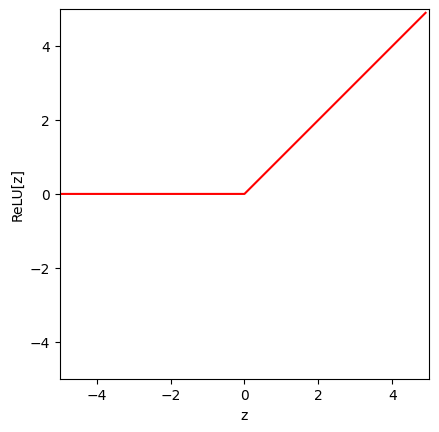

In [4]:
# Make an array of inputs
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)
show_ReLU(z, RelU_z)
# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show()

In [5]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # TODO Replace the lines below to compute the three initial lines
  # (figure 3.3a-c) from the theta parameters.  These are the preactivations
  pre_1 = theta_10 + theta_11*x
  pre_2 = theta_20 + theta_21*x
  pre_3 = theta_30 + theta_31*x

  # Pass these through the ReLU function to compute the activations as in
  # figure 3.3 d-f
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  

  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
  # To create the equivalent of figure 3.3 g-i
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  # TODO Replace the code below to combining the weighted activations and add
  # phi_0 to create the output as in figure 3.3 j
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [6]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,2]);ax[plot_x,plot_y].set_ylim([-2,2])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$')
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,2]);ax.set_ylim([-2,2])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

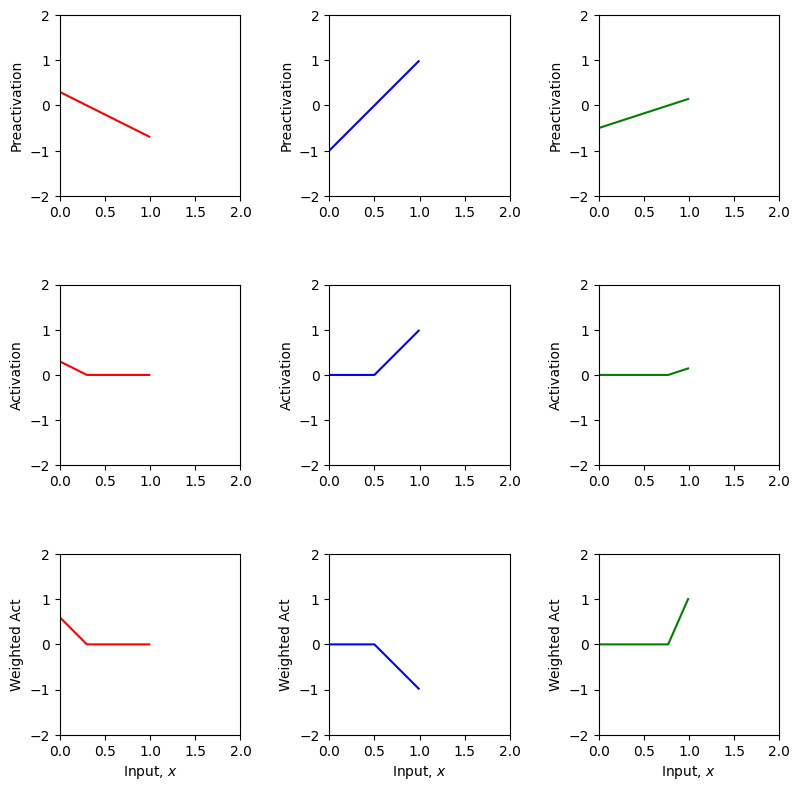

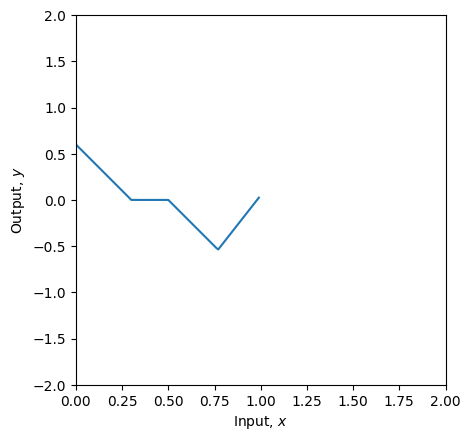

In [7]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

If your code is correct, then the final output should look like this:


Now let's play with the parameters to make sure we understand how they work.  The original  parameters were:

$\theta_{10} =  0.3$ ; $\theta_{11} = -1.0$<br>
$\theta_{20} =  -1.0$ ; $\theta_{21} = 2.0$<br>
$\theta_{30} =  -0.5$ ; $\theta_{31} = 0.65$<br>
$\phi_0 = -0.3; \phi_1 = 2.0; \phi_2 = -1.0; \phi_3 = 7.0$

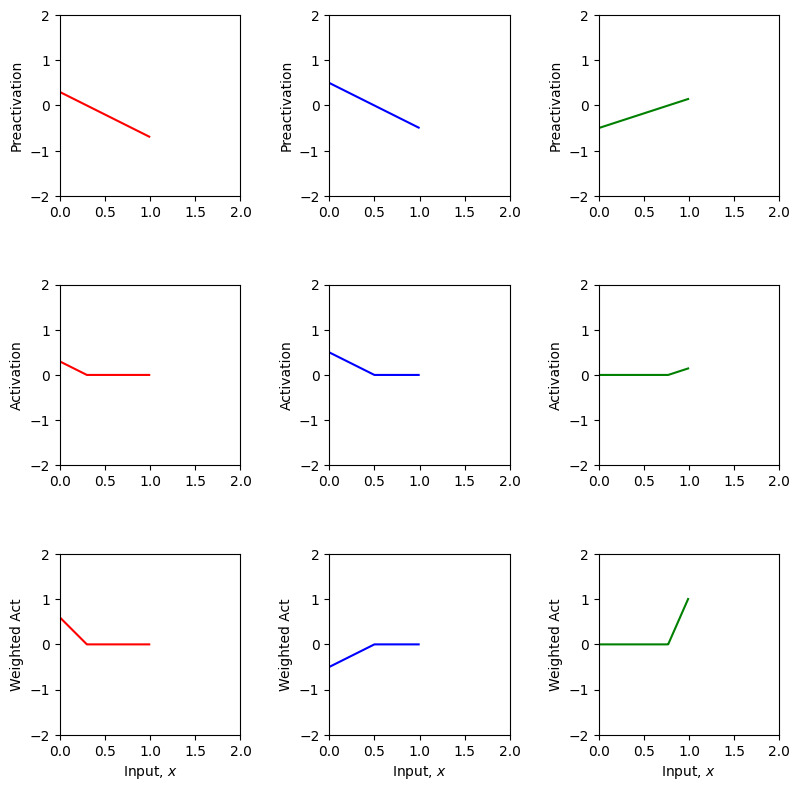

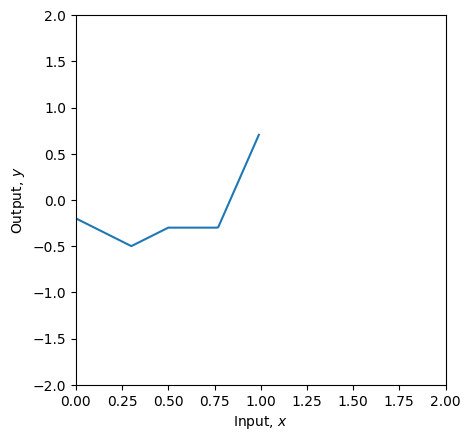

In [8]:
# TODO
# 1. Predict what effect changing phi_0 will have on the network.
## phi_0 is the bias term, so changing it will shift the entire network up or down.

# 2. Predict what effect multiplying phi_1, phi_2, phi_3 by 0.5 would have.  Check if you are correct
## phi_1, phi_2, phi_3 are the weights for the hidden units, so multiplying them by 0.5 will change the slope of the line
## after the ReLU function is applied.

# 3. Predict what effect multiplying phi_1 by -1 will have.  Check if you are correct.
## if we multiply phi_1 by -1, the line after the ReLU function will be reflected over the x-axis.

# 4. Predict what effect setting theta_20 to -1.2 will have.  Check if you are correct.
## theta_20 is the bias term for the second hidden unit, so changing it will shift the entire network down.
# 5. Change the parameters so that there are only two "joints" (including outside the range of the plot)
# There are actually three ways to do this. See if you can figure them all out
"""
theta_10 =  0.5 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = 1.0; phi_3 = 0.4
"""

# 6. With the original parameters, the second line segment is flat (i.e. has slope zero)
# How could you change theta_10 so that all of the segments have non-zero slopes
# theta_10 is the bias term for the first hidden unit, so changing it will shift the entire network up or down.
# theta_10 = 1

# 7. What do you predict would happen if you multiply theta_20 and theta21 by 0.5, and phi_2 by 2.0?
# Check if you are correct.
# if we multyply theta_20 by 0.5 as theta_20 is the bias for the second hidden unit, first the second hiden
# unit will shit up ant the new point-cut at axis y is -0.5

# 8. What do you predict woauld happen if you multiply theta_20 and theta21 by -0.5, and phi_2 by -2.0?
# Check if you are correct.
## if we multiply theta_20 by -0.5 the hiden unit is displaced 1 units upward, so 
## the new cut point at y-axis is in 0.5
## also if we multiply theta_21 by -0.5 firtly the sense of the line change, now is
## a decrecient function but also the slope is reduce to -1.0
## finally when we change phi_2 

theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0*-0.5  ; theta_21 = 2.0*-0.5
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Least squares loss

Now let's consider fitting the network to data.  First we need to define the loss function.  We'll use the least squares loss:

\begin{equation}
L[\boldsymbol\phi] = \sum_{i=1}^{I}(y_{i}-\text{f}[x_{i},\boldsymbol\phi])^2
\end{equation}

where $(x_i,y_i)$ is an input/output training pair and $\text{f}[\bullet,\boldsymbol\phi]$ is the neural network with parameters $\boldsymbol\phi$.  The first term in the brackets is the ground truth output and the second term is the prediction of the model

In [9]:
# Least squares function
def least_squares_loss(y_train, y_predict):
  # TODO Replace the line below to compute the sum of squared
  # differences between the real values of y and the predicted values from the model f[x_i,phi]
  # (see figure 2.2 of the book)
  # you will need to use the function np.sum
  loss = np.sum((y_train - y_predict)**2)

  return loss

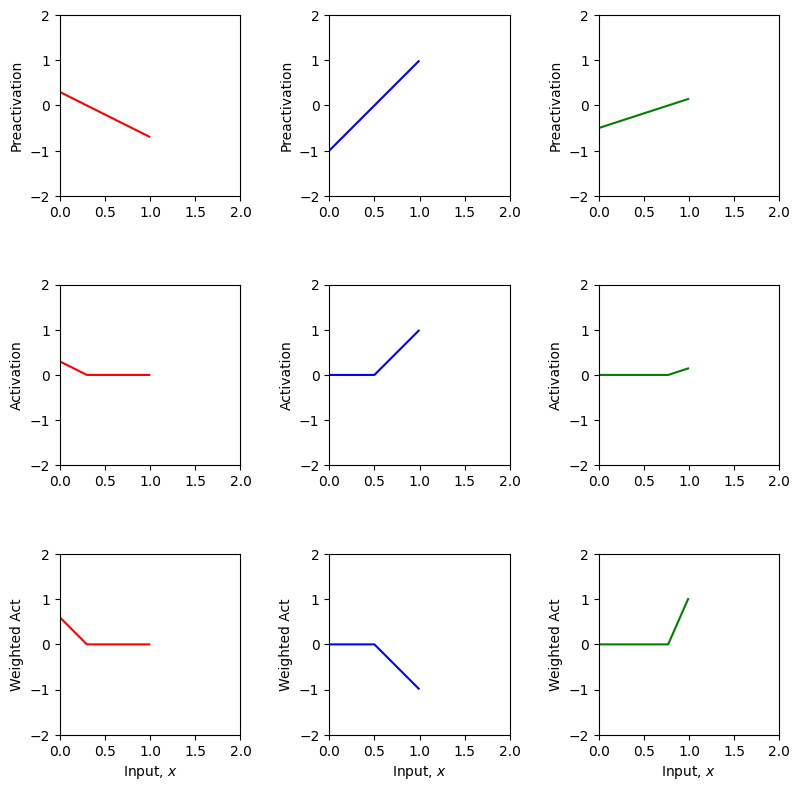

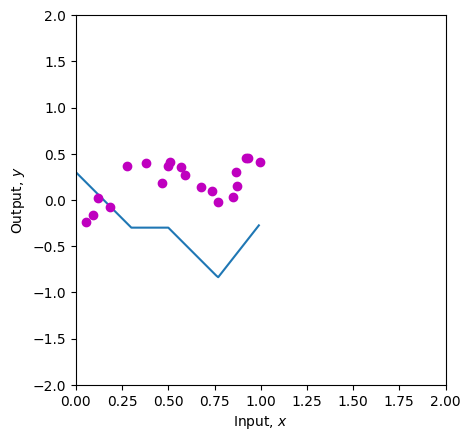

Your Loss = 9.385, True value = 9.385


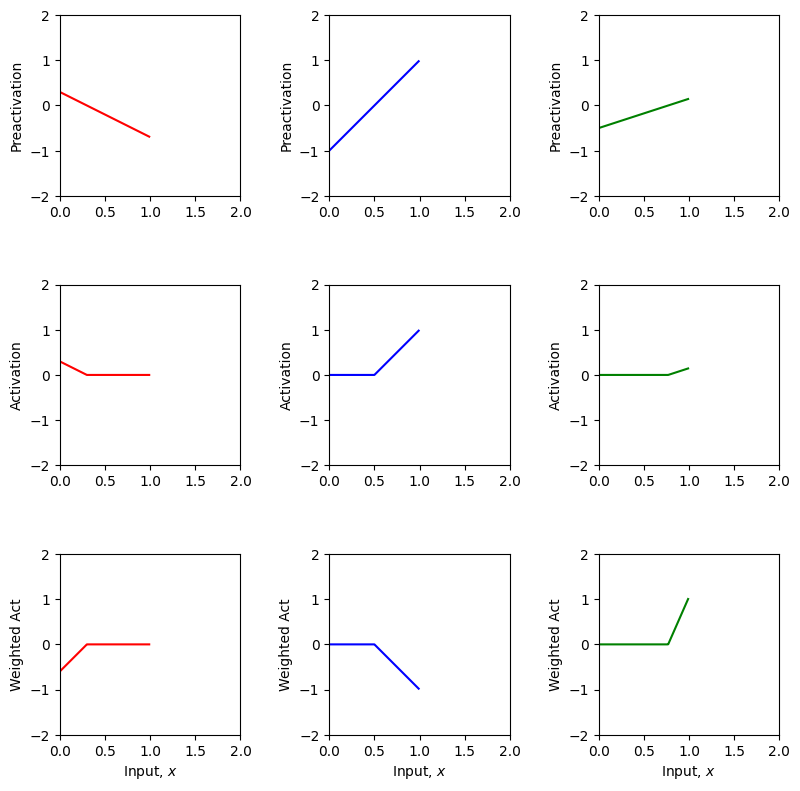

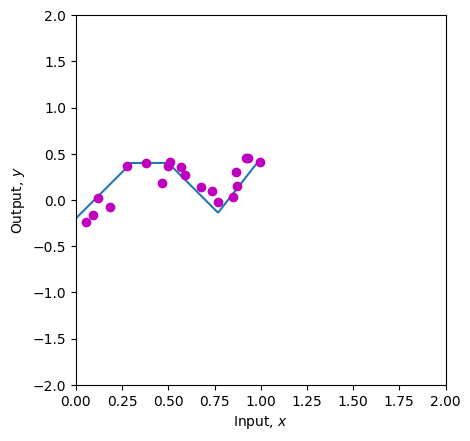

Your Loss = 0.328, True value = 9.385


In [10]:
# Now lets define some parameters, run the neural network, and compute the loss
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data = x_train, y_data = y_train)

# Run the neural network on the training data
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Compute the least squares loss and print it out
loss = least_squares_loss(y_train,y_predict)
print('Your Loss = %3.3f, True value = 9.385'%(loss))

# TODO.  Manipulate the parameters (by hand!) to make the function
# fit the data better and try to reduce the loss to as small a number
# as possible.  The best that I could do was 0.181
# Tip... start by manipulating phi_0.
# It's not that easy, so don't spend too much time on this!
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.4; phi_1 = -2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data = x_train, y_data = y_train)

# Run the neural network on the training data
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Compute the least squares loss and print it out
loss = least_squares_loss(y_train,y_predict)
print('Your Loss = %3.3f, True value = 9.385'%(loss))

## Ejercicios


### Problem 3.8

In [11]:
def heaviside(preactivation):
    # the heaviside function is 0 if the preactivation is less than 0, and 1 if the preactivation is greater than 0
    activation = np.zeros_like(preactivation)
    for i in range(len(preactivation)):
        if preactivation[i] < 0:
            activation[i] = 0
        else:
            activation[i] = 1
    return activation
    

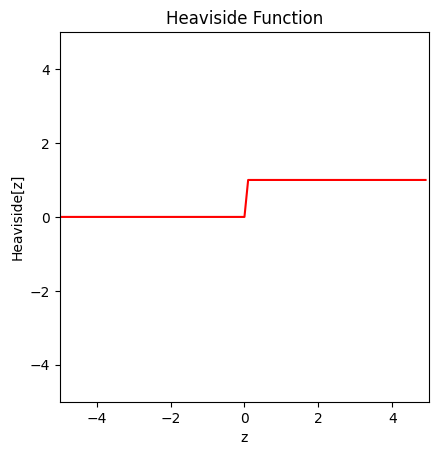

In [12]:
# Test if the Heaviside function works
def show_Heaviside(z, Heaviside_z):
    # Plot the Heaviside function
    fig, ax = plt.subplots()
    ax.plot(z,Heaviside_z,'r-')
    ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
    ax.set_xlabel('z'); ax.set_ylabel('Heaviside[z]')
    ax.set_aspect('equal')
    plt.title('Heaviside Function')
    plt.show()
z= np.arange(-5,5,0.1)
Heaviside_z = heaviside(z)
show_Heaviside(z, Heaviside_z)



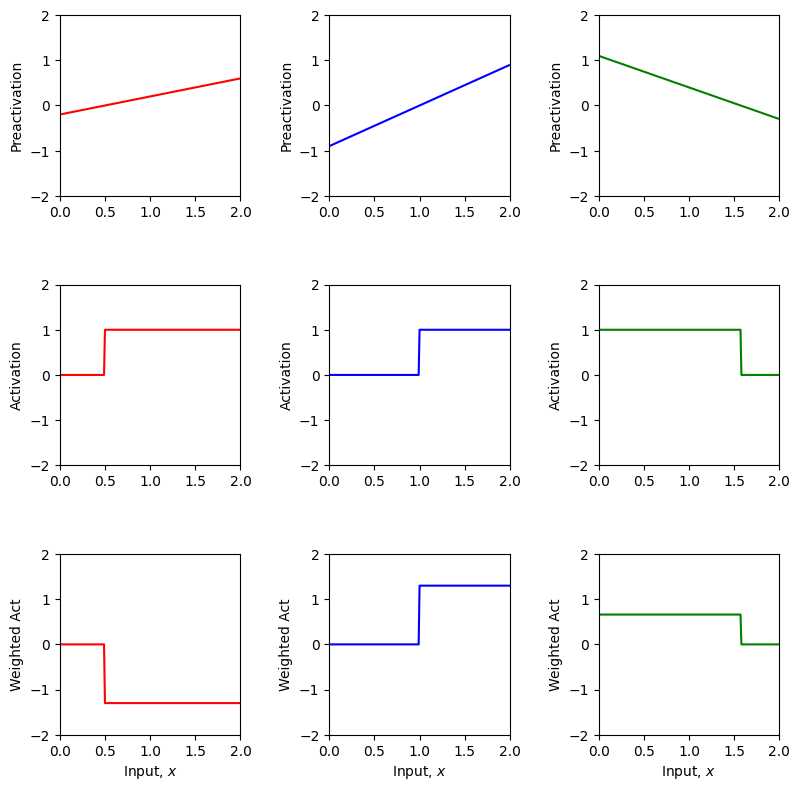

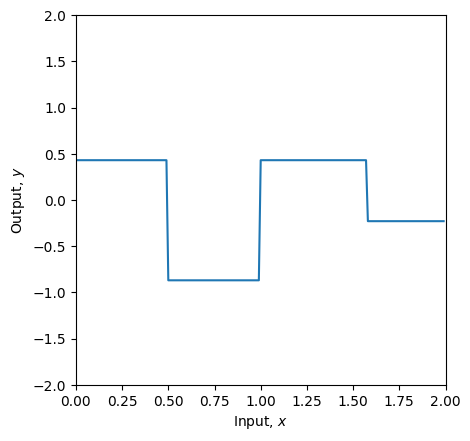

In [13]:
# Now lets define some parameters and run the neural network
# {ϕ0 , ϕ1 , ϕ2 , ϕ3 , θ10 , θ11 , θ20 , θ21 , θ30 , θ31 } = 
# {−0.23, −1.3, 1.3, 0.66, −0.2, 0.4, −0.9, 0.9, 1.1, −0.7}
theta_10 =  -0.2 ; theta_11 = 0.4
theta_20 = -0.9 ; theta_21 = 0.9
theta_30 = 1.1  ; theta_31 = -0.7
phi_0 = -0.23; phi_1 = -1.3; phi_2 = 1.3; phi_3 = 0.66

# Define a range of input values
x = np.arange(0,2,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, heaviside, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

In [14]:
def rect(preactivation):
    # the rect function is 0 if the preactivation is less than 0 or greater than 1, and 1 if the preactivation is between 0 and 1
    activation = np.zeros_like(preactivation)
    for i in range(len(preactivation)):
        if preactivation[i] < 0 or preactivation[i] > 1:
            activation[i] = 0
        else:
            activation[i] = 1
    return activation
    

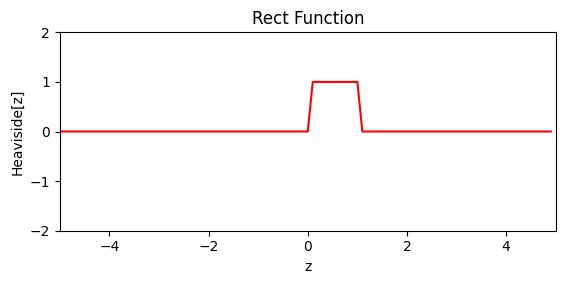

In [15]:
# Test if the Heaviside function works
def show_rect(z, Rect_z):
    # Plot the Heaviside function
    fig, ax = plt.subplots()
    ax.plot(z,Rect_z,'r-')
    ax.set_xlim([-5,5]);ax.set_ylim([-2,2])
    ax.set_xlabel('z'); ax.set_ylabel('Heaviside[z]')
    ax.set_aspect('equal')
    plt.title('Rect Function')
    plt.show()
z= np.arange(-5,5,0.1)
Rect_z = rect(z)
show_rect(z, Rect_z)



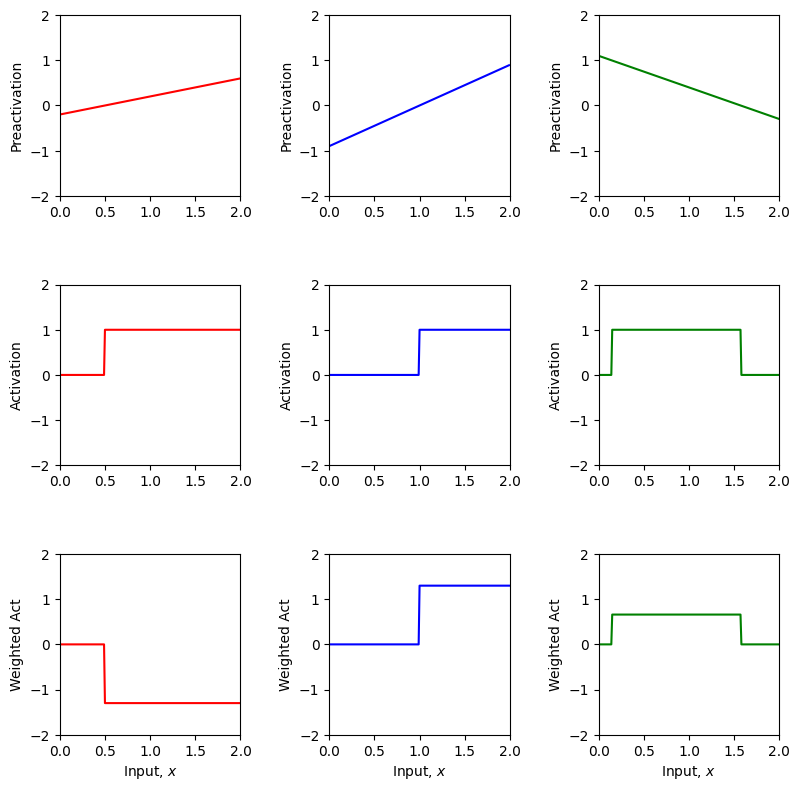

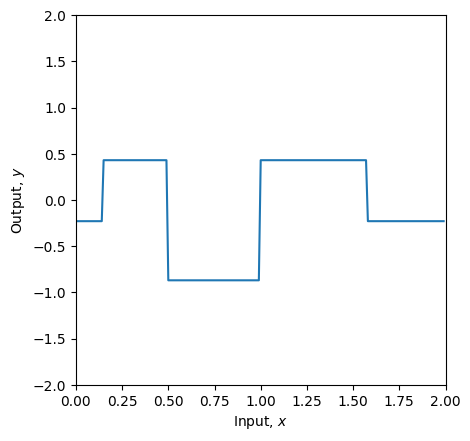

In [16]:
# Now lets define some parameters and run the neural network
# {ϕ0 , ϕ1 , ϕ2 , ϕ3 , θ10 , θ11 , θ20 , θ21 , θ30 , θ31 } = 
# {−0.23, −1.3, 1.3, 0.66, −0.2, 0.4, −0.9, 0.9, 1.1, −0.7}
theta_10 =  -0.2 ; theta_11 = 0.4
theta_20 = -0.9 ; theta_21 = 0.9
theta_30 = 1.1  ; theta_31 = -0.7
phi_0 = -0.23; phi_1 = -1.3; phi_2 = 1.3; phi_3 = 0.66

# Define a range of input values
x = np.arange(0,2,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, rect, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)